# Prediction of Churning Credit Card Customers

A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.

We could construct a model to predict which customer might be churned and the manager could proactively provide them better services and turn customers' decisions in the opposite direction.

In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

## Load the data and initial EDA

In [83]:
file_path = 'BankChurners.csv'
df = pd.read_csv(file_path)
#df.info() ## check data types and for missing values 


In [87]:
###Check for unknown values
#df[df == 'Unknown'].count()

In [82]:
df.shape
list(df.columns)

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [22]:
# checking for missing values
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [21]:
# summary statistics 
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


## Data Preprocessing and Feature Engineering:

In [88]:
df['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [23]:
df.dropna(inplace=True)

# encode categorical variables 
data_encoded = pd.get_dummies(df, columns=['Gender','Marital_Status', 'Education_Level'], drop_first = True)

# Select relevant features for profiling
selected_features = ['Customer_Age', 'Income_Category', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Attrition_Flag']
profile_data = data_encoded[selected_features]

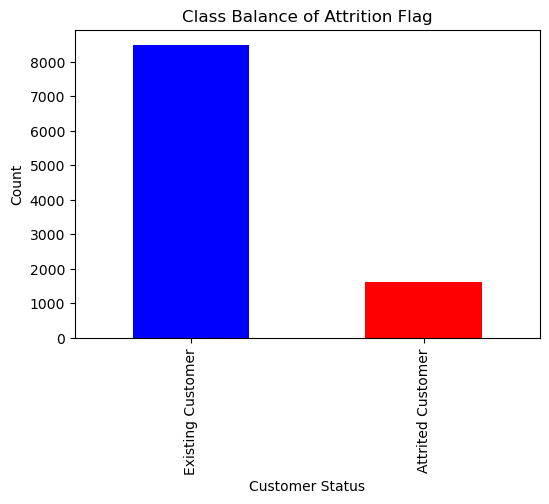

In [28]:
# creating a bar plot to visualize the class balance 
plt.figure(figsize=(6,4))
df['Attrition_Flag'].value_counts().plot(kind='bar', color=['blue','red'])
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.title('Class Balance of Attrition Flag')

plt.show()

## Customer Profiling and Persona Development
- Analyzing the relationships between different customer characteristics and attrition rates

In [89]:
cross_tab = pd.crosstab(index=df['Gender'],
                        columns=df['Attrition_Flag'])


cross_tab_prop = pd.crosstab(index=df['Gender'],
                        columns=df['Attrition_Flag'],
                             normalize="index")

cross_tab_prop = cross_tab_prop.reset_index()
cross_tab_prop

Attrition_Flag,Gender,Attrited Customer,Existing Customer
0,F,0.173572,0.826428
1,M,0.146152,0.853848


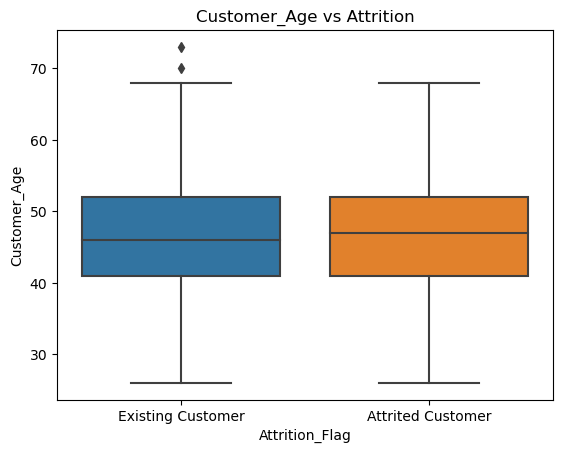

In [26]:
# exploring demographics
sns.boxplot(x='Attrition_Flag',y='Customer_Age', data=df)
plt.title('Customer_Age vs Attrition')
plt.show()

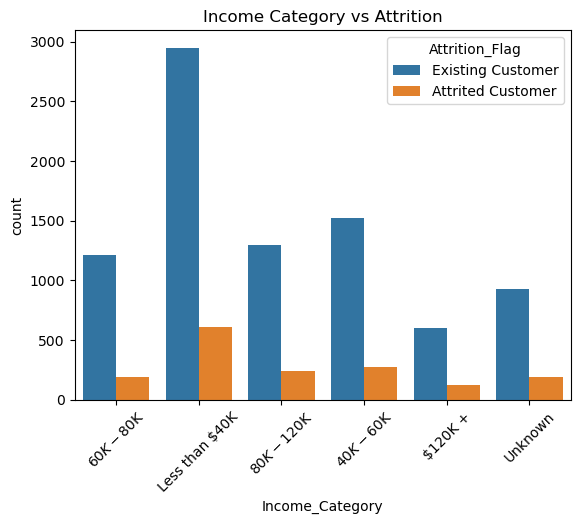

In [34]:
# exploring income
sns.countplot(x='Income_Category',hue='Attrition_Flag',data=df)
plt.title('Income Category vs Attrition')
plt.xticks(rotation=45)
plt.show()

In [91]:
cross_tab_prop = pd.crosstab(index=df['Income_Category'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,0.173315,0.826685
$40K - $60K,0.151397,0.848603
$60K - $80K,0.134807,0.865193
$80K - $120K,0.157655,0.842345
Less than $40K,0.171862,0.828138
Unknown,0.168165,0.831835


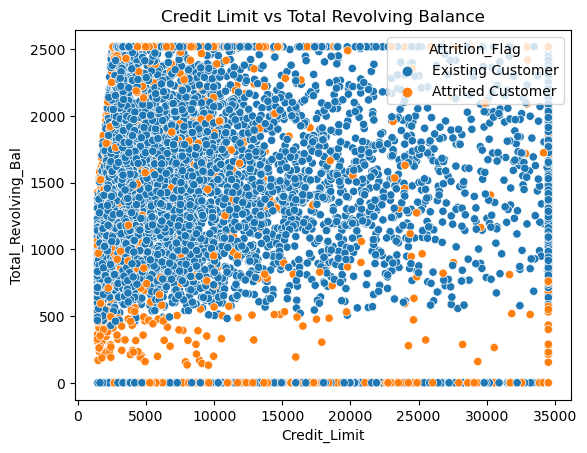

In [30]:
# exploring spending habits 
sns.scatterplot(x='Credit_Limit',y='Total_Revolving_Bal',hue='Attrition_Flag',data=df)
plt.title('Credit Limit vs Total Revolving Balance')
plt.show()

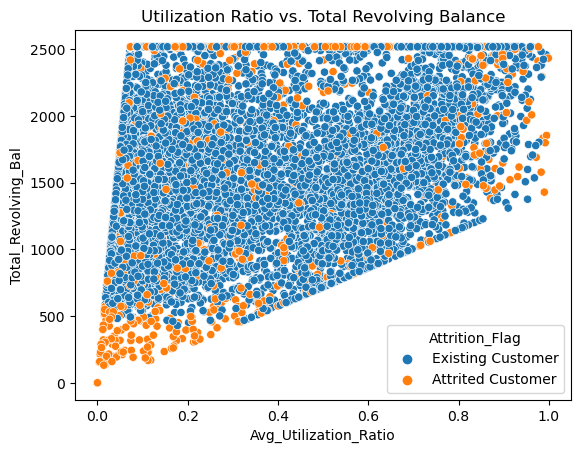

In [33]:
sns.scatterplot(x='Avg_Utilization_Ratio', y='Total_Revolving_Bal', hue='Attrition_Flag', data=df)
plt.title('Utilization Ratio vs. Total Revolving Balance')
plt.show()

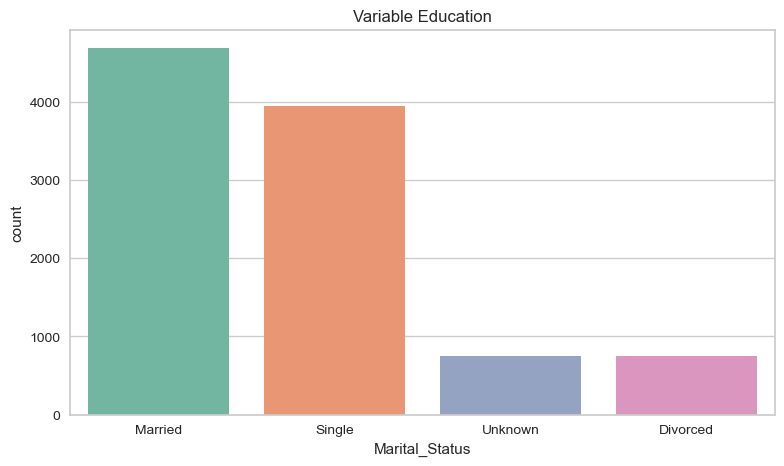

In [93]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Marital_Status', palette = 'Set2', data = df)
plt.show()

In [92]:
# marrital status
cross_tab = pd.crosstab(index=df['Marital_Status'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Marital_Status'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,Attrited Customer,Existing Customer
Marital_Status,,
Divorced,0.161765,0.838235
Married,0.151269,0.848731
Single,0.169414,0.830586
Unknown,0.172230,0.827770


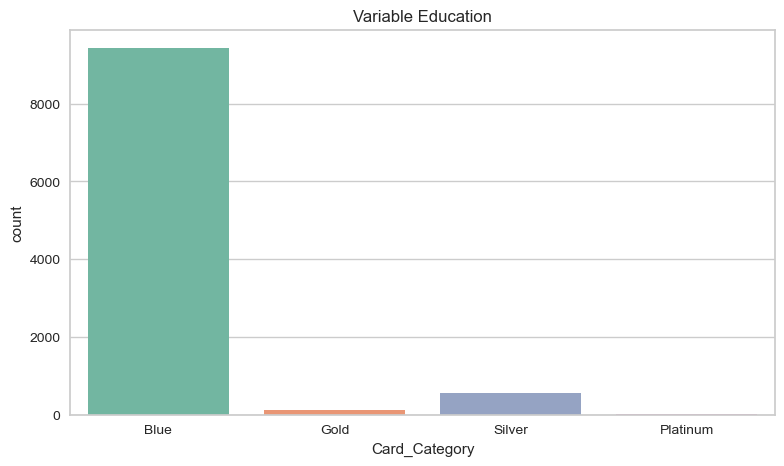

In [94]:
# card_categoru
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Card_Category', palette = 'Set2', data = df)
plt.show()

# Machine Learning for Attrition Prediction



In [43]:
# Select relevant features for profiling, including 'Attrition Flag'
selected_features = ['Customer_Age', 'Gender', 'Marital_Status', 'Education_Level', 'Income_Category', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Attrition_Flag']
profile_data = df[selected_features]

# encode categorical variables 
data_encoded = pd.get_dummies(profile_data, columns=['Gender', 'Marital_Status', 'Education_Level', 'Income_Category'], drop_first=True)

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [44]:


# defining X and y
X = data_encoded.drop('Attrition_Flag', axis=1)
y = data_encoded['Attrition_Flag']

In [45]:
# split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [46]:
# train a random forest classifier 
clf = RandomForestClassifier()
clf.fit(X_train,y_train)


RandomForestClassifier()

In [49]:
# make predictions
y_pred = clf.predict(X_test)

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Existing Customer', 'Existing Customer', 'Existing Customer'],
      dtype=object)

In [50]:
# evaluate the model 
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy", accuracy)
print(classification_report(y_test,y_pred))

Accuracy 0.8336623889437315
                   precision    recall  f1-score   support

Attrited Customer       0.47      0.22      0.30       327
Existing Customer       0.86      0.95      0.91      1699

         accuracy                           0.83      2026
        macro avg       0.67      0.59      0.60      2026
     weighted avg       0.80      0.83      0.81      2026



In [53]:
# defining a parameter grid for grid search
param_grid = {
       'n_estimators': [100,200,300],
        'max_depth': [None,10,20,30],
        'min_samples_split': [2,5,10],
        'min_samples_leaf': [1,2,4]
}

In [54]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [55]:
# retrieving the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search

In [56]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

In [59]:
print(classification_report(y_test,y_pred))

                   precision    recall  f1-score   support

Attrited Customer       0.71      0.07      0.13       327
Existing Customer       0.85      0.99      0.92      1699

         accuracy                           0.85      2026
        macro avg       0.78      0.53      0.52      2026
     weighted avg       0.82      0.85      0.79      2026



In [61]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [67]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = data_encoded[['Customer_Age','Credit_Limit','Total_Revolving_Bal','Avg_Utilization_Ratio']]

# standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


## Cluster analysis
- Will determine the optimal number of clusters using the Elbow Method. Will help decide how many clusters to create

In [70]:
!pip install yellowbrick


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 4.7 MB/s eta 0:00:0000:01


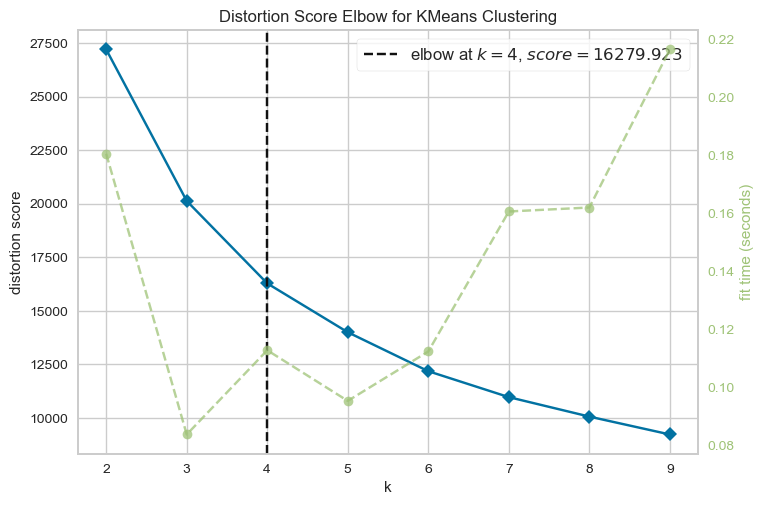

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(scaled_features)
visualizer.show()

In [72]:
# choosing the optimal number of clusters
num_clusters = 4

# fitting K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# adding cluster labels 
df['Cluster'] = cluster_labels

In [74]:
df.head()
df['Cluster'].value_counts()

2    3004
3    2701
1    2655
0    1767
Name: Cluster, dtype: int64

In [77]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
       'Cluster'],
      dtype='object')

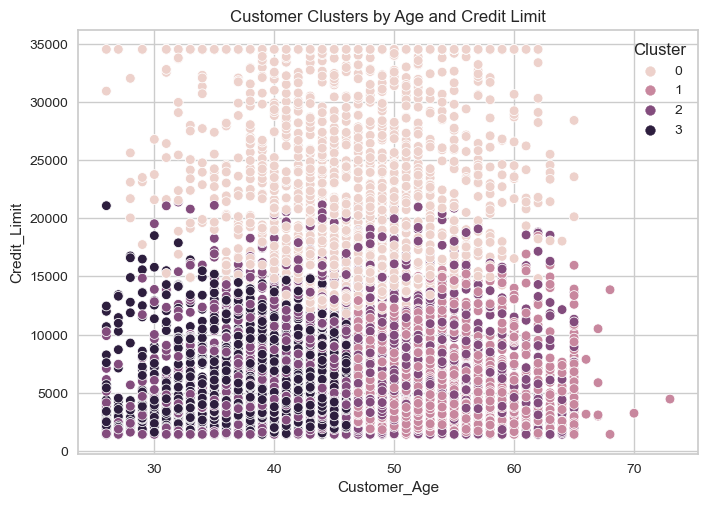

In [80]:
clustered_data = data_encoded.copy()
clustered_data['Cluster'] = cluster_labels

sns.scatterplot(x='Customer_Age',y='Credit_Limit',hue='Cluster', data=clustered_data)
plt.title('Customer Clusters by Age and Credit Limit')
plt.show()

## Customer Persona Creation

1. Persona 1: "Young Professionals"
- Age: 25-35
- Income category: High 
- Credit Limit: Moderate
- Total Resolving Balance: Low
- Utilization Ratio: Low
- Attrition Risk: Low
- Description: Young professionals with high incomes and responsible credit card usage. Low Attrition risk

2. Persona 2: Mature Savers
- Age: 40-55
- Income category: Moderate 
- Credit Limit: High
- Total Resolving Balance: Low
- Utilization Ratio: Low
- Attrition Risk: Very Low
- Description: Middle-age customers with moderate incomes and low credit card usage. Very low attrition risk. 

3. Persona 3: "Credit Card Enthusiasts"
- Age: 30-45 years
- Income Category: Moderate
- Credit Limit: High
- Total Revolving Balance: Moderate
- Utilization Ratio: Moderate
- Attrition Risk: Moderate
- Description: Customers who actively use their credit cards but maintain moderate balances. Moderate attrition risk.

